# Songs genres over time
**Author:** Vivian Li
<br> **Achievement:** 

# Loading Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import nbimporter
from collections import Counter

copy = pd.read_csv('/Users/vivianli/Documents/Data Science/evolution-of-music/exploration/data/billboards_data_w_artist_data.csv')

In [2]:
# create year column using date
copy['year'] = copy['date'].astype(str).str[:4]
copy = copy[['year','artist_genres']]
# fill in null values/ make them strings
copy= copy.fillna('n/a')

# clean up strings; get rid of whitespace in genres
for idx,row in copy.iterrows():
    row['artist_genres'] = row['artist_genres'].replace(" ", "")

# group by years to get all the genres for the songs that year
copy = copy.groupby(['year'])['artist_genres'].apply(','.join).reset_index()

In [3]:
headers = ['year','artist_genres']
full_list = []

for idx,row in copy.iterrows():
    year = row['year']
    year_genres = Counter(row['artist_genres'].split(','))
    year_genres = dict(year_genres)
    full_list.append(year_genres)

new_dataframe = pd.DataFrame(full_list)

In [4]:
new_dataframe.set_index([pd.Index(copy['year'])],inplace=True)

In [5]:
new_dataframe.drop(columns=['n/a'],inplace=True)
new_dataframe

,dancepop,neosoul,newjackswing,quietstorm,r&b,urbancontemporary,post-teenpop,pop,australianpop,boyband,...,australianindie,neo-singer-songwriter,pinoyhiphop,moombahton,nyroots,reggaetoncolombiano,etherpop,hopebeat,kentuckyhiphop,modernsouthernrock
year,,,,,,,,,,,,,,,,,,,,,
2000,290.0,126.0,124.0,70.0,197.0,230.0,81.0,130.0,13.0,65.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2001,229.0,125.0,107.0,87.0,203.0,225.0,73.0,118.0,9.0,47.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2002,267.0,104.0,47.0,34.0,177.0,203.0,86.0,176.0,15.0,21.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2003,226.0,98.0,69.0,58.0,136.0,166.0,67.0,144.0,10.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2004,183.0,58.0,43.0,35.0,115.0,127.0,87.0,126.0,11.0,5.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2005,262.0,43.0,22.0,19.0,137.0,215.0,124.0,208.0,12.0,11.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2006,219.0,53.0,18.0,11.0,106.0,140.0,152.0,196.0,9.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2007,267.0,42.0,17.0,15.0,99.0,129.0,198.0,239.0,11.0,8.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008,320.0,61.0,16.0,6.0,143.0,185.0,258.0,350.0,7.0,16.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Since there are too many genres for a good analysis, get the top 10 genres of all time and only include those in our data. Top 10 genres are determined by count of occurences in charts.

In [6]:
sums=pd.DataFrame()

for column in new_dataframe:
    sums = sums.append([[column,new_dataframe[column].sum()]])

sums = sums.sort_values([1],ascending=False).head(10)
top_10_genres_all_time = list(sums[0])
new_dataframe= new_dataframe[top_10_genres_all_time]

Stacked bar graph of counts of songs per genre over time

Text(0, 0.5, 'Count of Songs')

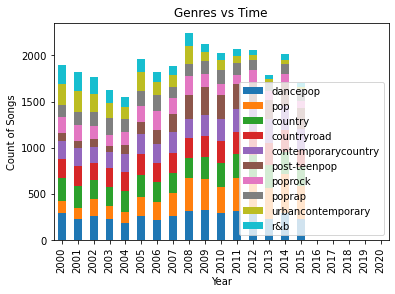

In [7]:
new_dataframe.plot(kind='bar', stacked=True)
plt.title("Genres vs Time")
plt.xlabel("Year")
plt.ylabel("Count of Songs")

Get percentages of each genre

Text(0, 0.5, 'Count of Songs')

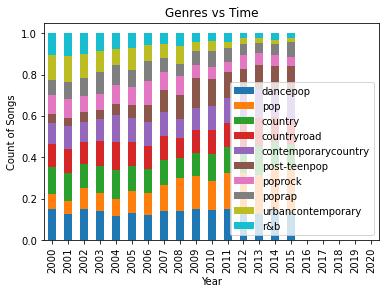

In [8]:
res = new_dataframe.div(new_dataframe.sum(axis=1), axis=0)
res.plot(kind='bar', stacked=True)
plt.title("Genres vs Time")
plt.xlabel("Year")
plt.ylabel("Count of Songs")